Nearest neighbours is one of the simplest predictive models there is. It makes no mathematical assumptions, and it doesn't required any sort of heavy machinery. The only thing it requires are:
- Some notion of distance
- An assumption that points that are close to one another are similar

In the general situation, we have some data points and we have a corresponding set of labels. The labels could be **True** and **False  **, indicating whether each input satisfies some conditions like "Is spam?" or "is poisonous?" or "would be enjoyable to watch?" they could be categories, like movie ratings (G, PG, PG-13, R, NC-17). Or they could be favorite programming languages.
 In our case, the data points will be vectors, which means that we can use the distance function.
 Let's say we've picked a number **k** like 3 or 5.  Then when we want to classify some new data point, we find the **k** nearest labeles points and let them vote on the new output.

 To do this, we'll need a function that counts votes. One possibility is:

In [3]:
from collections import Counter
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ =votes.most_common(1)[0]
    return winner

print(raw_majority_vote([1,2,3,4,5,6,8,4,1,2,1,2,3]))
print(raw_majority_vote([1,2,1,2]))

1
1


But this doesn't do anything intelligent with ties. For example , imagine we're rating movies and the five nearest movies are rated G, G, PG, PG and R. Then G hase two votes and PG also has two votes. In that case, we have several options:
- Pick one of the winners at random.
- Weight the votes by distance and pick the weighted winner.
- Reduce **k** until we find a unique winner.

We'll implement the third:

In [4]:
def majority_vote(labels):
    ''' assumes that labels are ordered from nearest to farthest'''
    vote_couts = Counter(labels)
    winner , winner_count = vote_couts.most_common(1)[0]
    num_winners = len([count for count in vote_couts.values() if count == winner_count])

    if num_winners == 1:
        return winner # Unique winner, so return it
    else:
        return majority_vote(labels[:-1])
        # try again without the farthest

print(majority_vote([1,2,1,2,3,4,5,6,7,8,8]))

1


This approach is sure to work eventually, since in the worst case we go all the way down to just one label, at which point that one label wins.
With this function it's easy to create a classifier:

In [2]:
def vector_add(v,w):
    ''' add correspnding elements'''
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_subtract(v, w):
    ''' subtracts corresponding element'''
    return [v_i - w_i for v_i, w_i in zip(v, w) ]

def vector_sum(vectors):
    '''sum all corresponding elements'''
    result = vectors[0]               # Start with the first vector
    for vector in vectors[1:]:       # then loop over the others
        result = vector_add(result, vector) # and add them to the result
    return result

def scalar_multiply(c,v):
    ''' c is a number, v is a vector'''
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    '''compute the vector whose ith element is the mean of the ith eleents of the input vectors'''
    n = len(vectors)
    return scalar_multiply(1/n , vector_sum(vectors))

def dot( v, w):
    ''' v_1 * w_1 + .....+ v_n * w_n'''
    return sum(v_i*w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    ''' v_1 * v_1 + .....+ v_n * v_n'''
    return dot(v,v)

import math

def magnitude(v):
    return math.sqrt(sum_of_squares(v)) # math.sqrt is square root function

def squared_distance(v,w):
    '''(v_1 - w_1)**2 + ...... + (v_n - w_n)**2'''
    return sum_of_squares(vector_subtract(v,w))

def distance( v,w):
    return math.sqrt(squared_distance(v,w))


In [3]:
print(distance([3,4] , [4,5]))

1.4142135623730951


In [12]:
def knn_classify(k , labeld_points, new_points):
    ''' each labeled point should be a pair (point, label)'''
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points, key = lambda point, _:distance(point, new_points))

    # Find the labls for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

## K-Nearest-Neighbours Using SKLearn library:-


 This breast cancer databases was obtained from the University of Wisconsin Hospitals

 Link of Data = [breast-cancer-wisconsin](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/)

**Information about data:-**

 |#  |Attribute     |                Domain|
 |  -- |------------------------|-----------------|
 |  1. |Sample code number   |         id number|
|------|---------------------|------------------|
|   2. |Clump Thickness       |        1 - 10|
|------|---------------------|------------------|
 |  3. |Uniformity of Cell Size  |     1 - 10|
|------|---------------------|------------------|
 |  4. |Uniformity of Cell Shape  |    1 - 10|
|  ------|---------------------|------------------|
 |  5. |Marginal Adhesion       |      1 - 10|
 |  ------|---------------------|------------------|
 |  6. |Single Epithelial Cell Size |  1 - 10|
 |  ------|---------------------|------------------|
 |  7. |Bare Nuclei          |         1 - 10|
 |  ------|---------------------|------------------|
 |  8. |Bland Chromatin      |         1 - 10|
 |  ------|---------------------|------------------|
 |  9. |Normal Nucleoli      |         1 - 10|
 |  ------|---------------------|------------------|
 | 10. |Mitoses              |         1 - 10|
 | ------|---------------------|------------------|
 | 11. |Class:                |        (2 for benign, 4 for malignant)|
 | ------|---------------------|------------------|

 Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

 Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)
 

In [23]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

# Reading data from dataset
df = pd.read_csv('dataset/breast-cancer-wisconsin.data')
# Since missing value is represented by **"?"** so replacing it with "-99999"
df.replace('?' , -99999, inplace = True)
# Dropig "id" column because it is not of the use
df.drop(['id'], 1, inplace = True)

In [8]:
# Dividing data in Feature data and Label data

X = np.array(df.drop(['class'], 1))
Y = np.array(df['class'])

# Now dividing data in train-test set
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [9]:
# Defining classifier

clf = neighbors.KNeighborsClassifier()
clf.fit(x_train , y_train)

accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9428571428571428


In [23]:
example_measures = np.array([4,1,1,2,5,3,5,4,6])
example_measures = example_measures.reshape(1 ,-1)

predict = clf.predict(example_measures)
print(predict)

[2]


If we do not reshape the data, we will get 

**ValueError: **Expected 2D array, got 1D array instead:

So to Avoid the error we should reshape the data using **array.reshape(1, - 1)** if it contains a single sample

In [20]:
example_measures = np.array([[4,1,1,2,5,3,5,4,6],[5,1,3,2,5,3,5,8,6]])
example_measures = example_measures.reshape(2 ,-1)

predict = clf.predict(example_measures)
print(predict)

[2 2]


In [21]:
example_measures = np.array([[4,1,1,2,5,3,5,4,6],[5,1,3,2,5,3,5,8,6]])
example_measures = example_measures.reshape(len(example_measures) ,-1)

predict = clf.predict(example_measures)
print(predict)

[2 2]


## K-Nearest-Neighbours from scratch

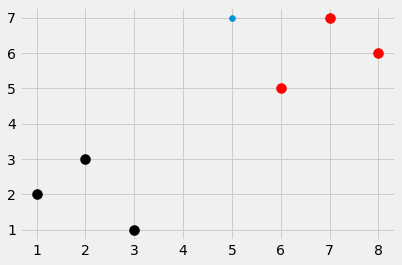

In [6]:
import matplotlib.pyplot  as plt 
dataset = {'k':[[1,2],[2,3],[3,1]] ,  'r': [[6,5],[7,7],[8,6]]}
new_feature = [5,7]
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0] ,ii[1], s= 100, color= i )

plt.scatter(new_feature[0], new_feature[1])
plt.show()

In [4]:
import numpy as np 
from math import sqrt
import matplotlib.pyplot as plt 
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [18]:
def k_nearest_neighbours (data , predict , k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []  # Creating a empty list to store the the distance between the instances

    for group in data:
        for feature in data[group]:
           
            # Using "np.linalg.norm" to find the euclidean distance
            euclidean_distance = np.linalg.norm(np.array(feature) - np.array(predict))
            
            distances.append([euclidean_distance , group])
    #print(distances)
    #print(sorted(distances))
    votes = [i[1] for i in sorted(distances)[:k]] 
    ''' Using "sorted()" function to sort the distance it will sort the distances in ascending order and then we can         take the first "k" group for the voting of the distance'''
    #print(votes)
    
    vote_result = Counter(votes).most_common(1)[0][0]
    # Count the number of votes then take out the first most common appeared vote
    print(Counter(votes).most_common(1))

    return vote_result

In [19]:
result = k_nearest_neighbours (dataset , new_feature , k = 4)
print(result)

[('r', 3)]
r


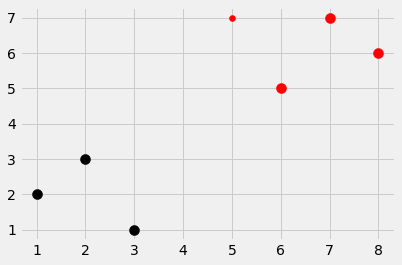

In [22]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0] ,ii[1], s= 100, color= i )

plt.scatter(new_feature[0], new_feature[1], color = result)
plt.show()